## [NYCDSA Capstone Project] 
# Women's Softball League Power Ranking Estimate

<br>
Koeun Lim (koeunlim@alum.mit.edu)<br>
Kevin Haghi (kevin.haghi@gmail.com)<br>


# Step 7-1. Modeling 3 - WS Ranking - Logistic

---
## Project Description



### Project Outline
- Step 1. Web scraping
- Step 2. Clean data
- Step 3. EDA
- Step 4. Imputation & PCA
- Step 5-1. Modeling (1) RPI prediction based on stats - XGboost regression
- Step 5-2. Modeling (1) RPI prediction based on stats - Linear regression
- Step 6-1. Modeling (2) WS 64 Seed prediction based on stats - XGboost classification
- Step 6-2. Modeling (2) WS 64 Seed prediction based on stats - Logistic regression
- Step 7-1. Modeling (3) WS Ranking prediction based on stats - XGboost multi-class classification
- Step 7-2. Modeling (3) WS Ranking prediction based on stats - Logistic multi-class regression
- Step 8. Visualization & Dashboard 

In [56]:
import pandas as pd
import numpy as np
import seaborn as sn
from datetime import datetime
from scipy import stats
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 500)

### Load Data & Preprocess

In [3]:
y_WSrank = pd.read_csv('Data/y_WSrank.csv')
y_WSrank = y_WSrank[~y_WSrank.WCWS_Rank.isnull()]
idx_WS = y_WSrank.index
y_WSrank = y_WSrank.reset_index(drop=True)
y_WSrank

WCWS_Rank
0          1.0
1          5.0
2          3.0
3          3.0
4          2.0
5          5.0
6          7.0
7          7.0
8          9.0
9          9.0
10         9.0
11         9.0
12         9.0
13         9.0
14         9.0
15        17.0
16         9.0
17        33.0
18        17.0
19        33.0
20        17.0
21        33.0
22        17.0
23        33.0
24        17.0
25        17.0
26        17.0
27        33.0
28        17.0
29        33.0
30        17.0
31        33.0
32        17.0
33        33.0
34        17.0
35        17.0
36        33.0
37        17.0
38        33.0
39        33.0
40        17.0
41        49.0
42        33.0
43        33.0
44        33.0
45        17.0
46        33.0
47        33.0
48        49.0
49        49.0
50        49.0
51        17.0
52        49.0
53        49.0
54        49.0
55        49.0
56        49.0
57        49.0
58        49.0
59        49.0
60        49.0
61        49.0
62        49.0
63        49.0
64         1.0
65         9.0
66         2.0
67         5.0
68         3.0
69         7.0
70         9.0
71         3.0
72         9.0
73         9.0
74         9.0
75         9.0
76         7.0
77        17.0
78        17.0
79         5.0
80        17.0
81        17.0
82         9.0
83        17.0
84        33.0
85        33.0
86         9.0
87        17.0
88        17.0
89        17.0
90        17.0
91        33.0
92        49.0
93        33.0
94        17.0
95        17.0
96        33.0
97        17.0
98        17.0
99        33.0
100       33.0
101       17.0
102       33.0
103       49.0
104       33.0
105       33.0
106       33.0
107       33.0
108       49.0
109       33.0
110       17.0
111       49.0
112       33.0
113       33.0
114       17.0
115       49.0
116       49.0
117       33.0
118       49.0
119       49.0
120       49.0
121       49.0
122       49.0
123       49.0
124       49.0
125       49.0
126       49.0
127       49.0
128        3.0
129        5.0
130        2.0
131        3.0
132        9.0
133        1.0
134        9.0
135        9.0
136        7.0
137        7.0
138        5.0
139        9.0
140       17.0
141        9.0
142       17.0
143        9.0
144       17.0
145        9.0
146        9.0
147       17.0
148       17.0
149       17.0
150       17.0
151       17.0
152       17.0
153       33.0
154       17.0
155       17.0
156       33.0
157       17.0
158       33.0
159       17.0
160       49.0
161       33.0
162       49.0
163       49.0
164       49.0
165       33.0
166       33.0
167       17.0
168       49.0
169       33.0
170       33.0
171       33.0
172       17.0
173       33.0
174       49.0
175       33.0
176       33.0
177       33.0
178       49.0
179       33.0
180       17.0
181       49.0
182       33.0
183       49.0
184       49.0
185       33.0
186       49.0
187       49.0
188       49.0
189       49.0
190       49.0
191       49.0
192        1.0
193        3.0
194        3.0
195        2.0
196        7.0
197        5.0
198        5.0
199        9.0
200        7.0
201        9.0
202        9.0
203        9.0
204       33.0
205        9.0
206        9.0
207       17.0
208       33.0
209       17.0
210       17.0
211       17.0
212       17.0
213        9.0
214       33.0
215       17.0
216       17.0
217       17.0
218       17.0
219       17.0
220        9.0
221       17.0
222       33.0
223       33.0
224       17.0
225       33.0
226       17.0
227       33.0
228       49.0
229       17.0
230       33.0
231       33.0
232       49.0
233       33.0
234       17.0
235       49.0
236       17.0
237       49.0
238       49.0
239       49.0
240       33.0
241       33.0
242       33.0
243       33.0
244       49.0
245       49.0
246       49.0
247       49.0
248       49.0
249       49.0
250       33.0
251       33.0
252       49.0
253       49.0
254       49.0
255       49.0
256        1.0
257        2.0
258        3.0
259        9.0
260        9.0
261        5.0
262        7.0
263        7.0
264        3.0
265        5.0


In [4]:
data_clean = pd.read_csv('Data/clean_final.csv')
data_clean = data_clean[~data_clean.RPI_Ranking.isnull()]
y_WSrank_2019 = pd.DataFrame(data_clean[data_clean.Year == 2019].WCWS_Rank)
y_WSrank_2019 = y_WSrank_2019.fillna(49)
y_WSrank_2019

WCWS_Rank
0          2.0
1          1.0
2          3.0
3          5.0
4          9.0
5          3.0
6          7.0
7          9.0
8          5.0
9          7.0
10         9.0
11         9.0
12         9.0
13        17.0
14         9.0
15         9.0
16         9.0
17        17.0
18        17.0
19        17.0
20        17.0
21        33.0
22        17.0
23        17.0
24        17.0
25        17.0
26        17.0
27        17.0
28        17.0
29        17.0
30        33.0
31        33.0
32        49.0
33        17.0
34        17.0
35        17.0
36        33.0
37        33.0
38        33.0
39        33.0
40        33.0
41        49.0
42        49.0
43        33.0
44        49.0
45        49.0
46        49.0
47        49.0
48        49.0
49        49.0
50        49.0
51        49.0
52        49.0
53        49.0
54        49.0
55        33.0
56        49.0
57        49.0
58        49.0
59        49.0
60        49.0
61        33.0
62        49.0
63        49.0
64        49.0
65        49.0
66        49.0
67        49.0
68        49.0
69        49.0
70        49.0
71        49.0
72        49.0
73        49.0
74        49.0
75        49.0
76        33.0
77        49.0
78        49.0
79        49.0
80        49.0
81        49.0
82        49.0
83        49.0
84        49.0
85        49.0
86        49.0
87        49.0
88        49.0
89        49.0
90        49.0
91        49.0
92        49.0
93        49.0
94        49.0
95        49.0
96        49.0
97        33.0
98        49.0
99        49.0
100       49.0
101       49.0
102       49.0
103       49.0
104       33.0
105       49.0
106       49.0
107       33.0
108       49.0
109       49.0
110       49.0
111       49.0
112       49.0
113       49.0
114       49.0
115       49.0
116       49.0
117       49.0
118       49.0
119       49.0
120       49.0
121       49.0
122       49.0
123       49.0
124       49.0
125       49.0
126       49.0
127       49.0
128       49.0
129       49.0
130       49.0
131       49.0
132       49.0
133       49.0
134       49.0
135       49.0
136       49.0
137       49.0
138       49.0
139       49.0
140       49.0
141       49.0
142       49.0
143       49.0
144       49.0
145       49.0
146       49.0
147       49.0
148       49.0
149       49.0
150       49.0
151       49.0
152       49.0
153       49.0
154       49.0
155       49.0
156       49.0
157       49.0
158       49.0
159       49.0
160       49.0
161       49.0
162       49.0
163       49.0
164       49.0
165       49.0
166       49.0
167       49.0
168       49.0
169       49.0
170       49.0
171       49.0
172       49.0
173       49.0
174       49.0
175       49.0
176       49.0
177       49.0
178       49.0
179       49.0
180       49.0
181       49.0
182       49.0
183       49.0
184       49.0
185       49.0
186       33.0
187       49.0
188       49.0
189       49.0
190       49.0
191       49.0
192       49.0
193       49.0
194       49.0
195       49.0
196       49.0
197       49.0
198       49.0
199       49.0
200       49.0
201       49.0
202       49.0
203       49.0
204       49.0
205       49.0
206       49.0
207       49.0
208       49.0
209       49.0
210       49.0
211       49.0
212       49.0
213       49.0
214       49.0
215       49.0
216       49.0
217       49.0
218       49.0
219       49.0
220       49.0
221       49.0
222       49.0
223       49.0
224       49.0
225       49.0
226       49.0
227       49.0
228       49.0
229       49.0
230       49.0
231       49.0
232       49.0
233       49.0
234       49.0
235       49.0
236       49.0
237       49.0
238       49.0
239       49.0
240       49.0
241       49.0
242       49.0
243       49.0
244       49.0
245       49.0
246       49.0
247       49.0
248       49.0
249       49.0
250       49.0
251       49.0
252       49.0
253       49.0
254       49.0
255       49.0
256       49.0
257       49.0
258       49.0
259       49.0
260       49.0
261       49.0
262       49.0
263       49.0
264       49.0
265       49.0


In [5]:
X = pd.read_csv('Data/X.csv')
X = X[X.index.isin(idx_WS)]
X = X.reset_index(drop=True)
X

Fielding_Percentage  Scoring  Hit_Batters  Earned_Run_Average  \
0                 0.9770    5.860         18.6                1.50   
1                 0.9730    6.110         22.2                1.38   
2                 0.9690    6.320         22.2                1.83   
3                 0.9860    6.660         20.0                1.12   
4                 0.9790    5.770         19.8                1.18   
5                 0.9840    6.220         23.4                1.43   
6                 0.9690    5.160         14.8                1.54   
7                 0.9660    5.970         26.0                1.86   
8                 0.9790    4.920         26.2                2.10   
9                 0.9670    5.810         27.2                2.48   
10                0.9750    3.980         21.8                1.57   
11                0.9730    4.950         14.4                1.94   
12                0.9760    5.390         27.0                3.12   
13                0.9770    4.820         26.2                2.22   
14                0.9650    4.800         26.2                2.44   
15                0.9700    5.230         10.0                2.68   
16                0.9630    4.810         30.4                2.34   
17                0.9790    6.070         17.8                2.24   
18                0.9710    4.610         15.0                1.99   
19                0.9770    5.090         10.0                1.37   
20                0.9570    5.180         24.6                2.06   
21                0.9750    5.560         24.8                2.27   
22                0.9670    5.690         14.0                1.90   
23                0.9560    6.180         24.2                2.15   
24                0.9650    5.210         27.0                2.90   
25                0.9660    4.780         24.4                3.73   
26                0.9530    3.790         15.4                2.86   
27                0.9670    4.140         20.8                1.81   
28                0.9770    4.790         15.0                2.04   
29                0.9700    5.690         22.4                2.64   
30                0.9720    4.250         20.6                1.27   
31                0.9640    4.860          9.0                2.41   
32                0.9560    4.890         15.6                3.44   
33                0.9830    5.390         32.8                1.43   
34                0.9670    4.180         18.8                2.80   
35                0.9570    5.930         23.2                3.85   
36                0.9760    3.460         27.4                2.45   
37                0.9640    4.350         28.2                2.95   
38                0.9680    4.340         20.2                1.92   
39                0.9520    5.820         30.8                3.56   
40                0.9680    4.270         27.2                3.27   
41                0.9640    4.770         15.4                2.17   
42                0.9600    4.270         15.6                2.47   
43                0.9730    3.620         25.4                2.39   
44                0.9700    4.320         15.8                2.73   
45                0.9540    5.330         28.2                2.51   
46                0.9570    5.620         15.4                2.95   
47                0.9570    4.560         19.8                3.00   
48                0.9700    5.420         19.0                2.07   
49                0.9720    4.620         19.4                2.27   
50                0.9490    6.770         22.8                3.16   
51                0.9600    4.170         15.2                3.27   
52                0.9400    5.320         22.4                3.09   
53                0.9690    5.100         12.8                2.41   
54                0.9510    5.600         21.2                4.02   
55                0.9660    5.400         20.4                2.61   
56             

In [6]:
X_2019 = pd.read_csv('Data/X_2019.csv')
X_2019 

Fielding_Percentage  Scoring  Hit_Batters  Earned_Run_Average  \
0                 0.9840    7.300         14.0               1.400   
1                 0.9740    7.030         42.0               1.430   
2                 0.9800    5.250         24.0               1.470   
3                 0.9760    6.480         22.0               1.610   
4                 0.9730    6.980         32.0               1.870   
5                 0.9720    6.170         27.0               2.140   
6                 0.9760    5.380         27.0               1.670   
7                 0.9630    5.030         24.0               1.700   
8                 0.9710    5.740         37.0               2.750   
9                 0.9860    4.510         43.0               1.870   
10                0.9660    7.570         36.0               1.660   
11                0.9740    5.230         53.0               1.950   
12                0.9700    5.790         35.0               2.500   
13                0.9780    6.100         42.0               2.000   
14                0.9580    5.180         26.0               2.290   
15                0.9670    6.350         34.0               3.090   
16                0.9780    5.750         22.0               2.210   
17                0.9730    6.670         14.0               1.480   
18                0.9720    6.070         40.0               3.030   
19                0.9680    5.530         13.0               2.670   
20                0.9720    4.720         37.0               2.880   
21                0.9730    5.190         22.0               1.960   
22                0.9590    5.880         30.0               2.950   
23                0.9620    7.470         53.0               4.640   
24                0.9660    6.030         36.0               2.450   
25                0.9640    5.220         25.0               3.310   
26                0.9690    6.810         38.0               1.980   
27                0.9590    5.170         40.0               3.360   
28                0.9680    5.860         25.0               2.200   
29                0.9570    4.470         24.0               2.810   
30                0.9630    4.660         33.0               3.290   
31                0.9740    3.200         43.0               2.140   
32                0.9470    4.900         43.0               2.000   
33                0.9570    5.360         31.0               3.270   
34                0.9630    6.380         36.0               3.220   
35                0.9560    4.670         14.0               1.970   
36                0.9670    6.000         20.0               2.680   
37                0.9660    6.530         20.0               2.570   
38                0.9670    5.090         28.0               2.290   
39                0.9670    5.140         18.0               2.790   
40                0.9530    5.550         28.0               4.050   
41                0.9430    4.070         20.0               3.530   
42                0.9790    5.410         22.0               2.800   
43                0.9710    6.070         66.0               2.880   
44                0.9790    5.140         33.0               2.390   
45                0.9750    4.710         22.0               2.620   
46                0.9750    5.160         32.0               2.570   
47                0.9680    4.000         34.0               3.250   
48                0.9610    4.340         18.0               2.590   
49                0.9650    4.420         31.0               3.700   
50                0.9640    3.470         27.0               1.880   
51                0.9660    4.320          9.0               2.220   
52                0.9690    4.970         35.0               3.400   
53                0.9590    5.170         19.0               2.740   
54                0.9640    4.190         29.0               1.600   
55                0.9620    5.320         39.0               2.350   
56             

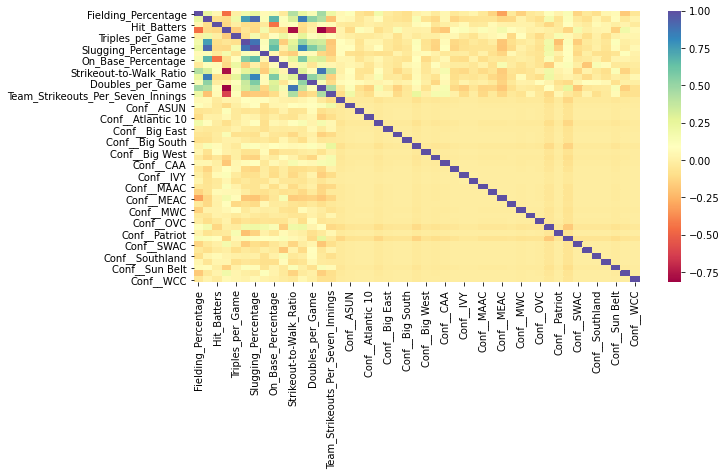

In [7]:
corrMatrix = X.corr()
sn.heatmap(corrMatrix, annot=False, cmap="Spectral")
plt.show()

In [21]:
corrMatrix_abs = pd.DataFrame(corrMatrix.abs().unstack().sort_values(kind="quicksort",ascending=False))
corrMatrix_abs.columns = ['rho']
corrMatrix_abs = corrMatrix_abs[corrMatrix_abs.rho < 1]
print(corrMatrix_abs[corrMatrix_abs.rho >= 0.4].iloc[::2].shape[0])
corrMatrix_abs[corrMatrix_abs.rho >= 0.4].iloc[::2]

25


rho
Slugging_Percentage               Scoring                            0.916969
Home_Runs_per_game                Slugging_Percentage                0.884188
Strikeout-to-Walk_Ratio           Shutouts                           0.878769
Scoring                           Batting_Average                    0.856236
Batting_Average                   Slugging_Percentage                0.827045
Earned_Run_Average                Shutouts                           0.819309
                                  Strikeout-to-Walk_Ratio            0.777210
Scoring                           Home_Runs_per_game                 0.749015
                                  On_Base_Percentage                 0.668979
On_Base_Percentage                Slugging_Percentage                0.645293
Team_Strikeouts_Per_Seven_Innings Earned_Run_Average                 0.619347
On_Base_Percentage                Batting_Average                    0.576272
Slugging_Percentage               Doubles_per_Game                   0.571912
On_Base_Percentage                Home_Runs_per_game                 0.558796
Home_Runs_per_game                Batting_Average                    0.529845
Doubles_per_Game                  Scoring                            0.528092
Batting_Average                   Doubles_per_Game                   0.520700
Fielding_Percentage               Shutouts                           0.472159
                                  Earned_Run_Average                 0.452699
Shutouts                          Team_Strikeouts_Per_Seven_Innings  0.451716
Team_Strikeouts_Per_Seven_Innings Strikeout-to-Walk_Ratio            0.439481
Hit_Batters                       On_Base_Percentage                 0.439149
Shutouts                          Scoring                            0.430723
                                  Slugging_Percentage                0.430245
Fielding_Percentage               Strikeout-to-Walk_Ratio            0.430112

In [22]:
pca = PCA(n_components=15)
scaler = StandardScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X.iloc[:,0:15]))
X_norm.columns = X.columns[0:15]
X_PCA = pd.DataFrame(pca.fit_transform(X_norm))
X_PCA

0         1         2         3         4         5         6   \
0    2.199676 -1.366385  1.314218  2.104396  1.950404  0.291941 -0.437139   
1    2.880162 -1.790341 -0.819430  2.136151 -0.227409  1.039105  0.393964   
2    2.891065 -1.639517 -0.247650  1.929725 -0.622997 -0.433217  1.145118   
3    4.175412 -2.777696 -1.345706  0.922431 -0.765324  1.442469 -0.356966   
4    2.663700 -2.837124 -0.299772  1.711012 -0.518932 -0.179205 -0.668706   
5    1.507598 -2.258351 -1.221170  1.367549  0.251043 -0.213356 -0.004997   
6    1.198583 -2.390013 -0.984850 -0.026450 -0.566354 -0.832671  0.972714   
7    1.862591 -0.531032  1.542690  2.713352 -1.143201  0.428377  0.686556   
8    0.328158 -2.212293 -1.821366  2.919059  0.856369  0.007396  0.554616   
9   -0.058651 -0.276033 -0.220276  2.795881 -0.778884  1.296558  0.535528   
10  -1.795768 -4.013287 -0.980746  1.854085 -0.170565  0.556665 -0.358669   
11   1.194853 -1.951216 -1.733061 -0.188899 -1.034110 -0.257814  0.330886   
12  -0.315221 -0.421159 -0.036594  3.229985  0.342525  1.458622  0.302802   
13   0.191704 -2.205702 -1.332627  2.917126  0.175705  0.565560  0.120029   
14  -0.713689 -2.114380 -0.208492  2.258734 -0.290714  0.990939  1.751668   
15  -0.431262 -0.560346  0.878878 -1.043008  0.092499 -0.691566 -0.359947   
16  -0.670166 -2.196923 -0.754070  2.976300 -1.987203 -0.420906  1.766412   
17   1.327598 -0.091143 -1.299317  1.578545  0.185968 -1.070604 -0.252729   
18  -2.059449 -1.694287 -0.208931  0.703731  1.579974  0.383779 -0.921832   
19  -0.191417 -1.615131  0.362964 -1.045907  2.165759  0.701523 -0.504179   
20   0.641404 -1.820082  0.977490  2.171274 -0.783680 -1.379217  1.834321   
21  -0.239862 -0.824459 -1.120452  3.542896  0.609248 -1.239772 -0.584825   
22   0.782892 -1.974447 -0.075310 -0.110688  0.122057 -1.035723  0.116614   
23   1.662505 -0.201365 -1.482034  1.977634 -2.612648  0.560900  1.480113   
24  -0.666529  0.147882 -0.819802  3.290703 -0.347456 -0.687508  1.157634   
25  -1.532777  1.180316 -1.130184  3.018673 -0.550295  0.930225 -0.383539   
26  -4.135760 -0.451768 -0.548849  0.516766 -0.505130  0.775738  0.972664   
27  -2.207447 -2.775226  0.547342  1.852379 -0.309397 -0.953793  0.569191   
28   0.317122 -1.423894  1.533276  1.494504  1.351201 -1.367719 -1.383777   
29   0.365369  0.127198 -1.008176  1.740362 -0.951405  0.208135  0.367828   
30  -1.230402 -3.683021  0.199886  1.435853 -0.418732  0.633274 -1.026882   
31  -1.305246 -0.577807  1.209059 -0.951440  1.288774 -1.836496  0.021245   
32  -1.443994  1.738778 -0.603831  0.470213 -0.103724 -0.395746  1.222325   
33   0.807982 -3.962697 -0.217819  3.574915 -1.289550  0.170049 -0.800744   
34  -3.342665 -1.472069 -0.018606  1.495276  1.086367  0.798732  0.147605   
35  -1.116679  1.238163  2.018319  2.162304 -0.243199  0.478181  0.146986   
36  -3.467236 -2.575256 -1.485242  3.714209 -0.945266 -0.561831 -1.208683   
37  -2.954200 -1.156821 -0.080041  3.536832 -1.035116  0.231476  0.387962   
38  -2.140358 -2.745814 -1.455976  1.606104  1.293520 -0.148199  1.424933   
39  -0.934495  1.153483  2.178288  3.415289 -1.424700  2.508682  0.912302   
40  -3.267347  0.015521  0.171577  3.972659  1.984635  1.010447  0.033466   
41  -0.540712 -1.586241 -0.367686  0.545096 -0.201545 -1.267326  0.045561   
42  -2.109698 -1.297493 -0.400209  0.211173 -0.966959  0.421660  0.601731   
43  -3.504190 -2.533980 -1.444740  2.978350 -1.511740  0.142753 -1.439629   
44  -2.373594 -1.541954  0.351717  0.505602  0.014305 -1.186969 -0.073613   
45  -1.091360 -0.389489  1.014186  3.173632 -1.841609 -1.182230  2.067986   
46  -0.488139  1.326150  0.092015  0.708334 -0.485730  0.556141  0.539975   
47  -2.905217 -0.833921 -0.256811  1.711453 -0.152014  0.403154 -0.164656   
48   0.010226 -1.288609 -2.469835  1.209832 -0.309013 -0.565367  0.169798   
49  -1.619389 -1.365927 -0.576220  1.671274 -0.728240 -0.355523 -0.905033   
50   1.637514  2.282791  1.351349  2.363936 -1.294136 -0.267135  0.525381   
51  -3.

In [23]:
X_norm_2019 = pd.DataFrame(scaler.fit_transform(X_2019.iloc[:,0:15]))
X_norm_2019.columns = X.columns[0:15]
X_PCA_2019 = pd.DataFrame(pca.transform(X_norm_2019))
X_PCA_2019

0         1         2         3         4         5         6   \
0    9.814006 -2.139008 -0.426885 -1.121207 -0.161142 -0.307694  0.666712   
1    6.962091 -2.250100 -0.201983  0.620996 -0.822048  0.243041  0.603458   
2    4.427429 -4.138485 -1.112325 -1.005258 -0.267875  0.289325 -0.122594   
3    5.801728 -0.926175 -2.404890 -0.857491 -0.555927  0.067221  0.907820   
4    7.435512 -0.947126  0.845185  0.363175  0.547913  0.530408  0.597034   
5    3.632162 -0.879434  0.781526 -0.842722 -0.419658  2.189231 -0.063899   
6    4.492463 -3.401996 -0.874038 -0.688030 -0.579267 -1.262132  0.107429   
7    3.626964 -3.576633  0.199714 -0.910735  0.349980 -1.172544  0.348675   
8    3.302437  0.965645 -1.749391  1.291756  1.617863  0.675286  0.052532   
9    2.871653 -4.932611 -1.555019 -0.025478  0.422888 -0.184507  0.530765   
10   6.859129 -0.130605 -1.023297  0.170495 -1.575453  0.000260  0.687910   
11   3.076153 -3.826665 -0.889142  0.683175 -1.166708 -0.511601  0.217859   
12   3.843546  0.279584 -0.140111  0.221097 -0.717280  0.921531 -0.504715   
13   4.738937 -2.219072 -0.671180  0.546332 -0.720426  0.231592 -0.943044   
14   2.293058 -2.556418  2.489011 -0.451067  1.689315  0.270558  1.360278   
15   3.873842  1.375448 -0.393190  0.884704  1.125497  0.301197  0.073630   
16   3.568313 -1.644831 -0.027886 -1.023776 -0.576969  0.554353 -0.773296   
17   6.194407 -1.582899  1.883888 -1.237478  0.472194  2.287807 -1.385585   
18   4.020863  0.452910  1.317491  0.716574 -0.017506  0.550406  0.016608   
19   2.887708  0.266905 -0.462855 -0.687856  1.705964  0.656048  0.392410   
20   1.363878 -2.321036  2.004565 -0.152153  1.462294  1.622829  0.334182   
21   2.820520 -3.789804  0.513236 -1.482688 -0.380959  0.761731 -1.019081   
22   3.659225  2.018157 -0.718612  0.327725 -0.266563 -0.346742  0.068033   
23   4.974523  3.172380  0.269974  2.241938 -0.607403 -0.289305  0.470543   
24   3.902104 -0.635793  0.258585  0.120395 -1.103814 -0.059902  0.633494   
25   2.318509  0.379398 -0.560961 -0.024643  0.219325  0.586747 -0.472326   
26   7.071905 -0.623633 -0.555547  0.671275 -0.874075  0.089334  0.383549   
27   1.662121  0.794630 -0.471407  0.611903 -0.662460  0.700241  1.169879   
28   3.292884 -0.430072 -0.887188 -0.061408  2.113440  0.161536  0.337886   
29   0.270864 -1.400705 -0.256972 -0.846618 -0.058899 -0.530084  0.087488   
30   0.914879 -0.259940  1.928610  0.351587  1.663541 -1.890682  1.228957   
31  -0.519526 -4.253451 -0.596558  0.463155  0.107955  0.955124 -0.206976   
32   2.392244 -2.352543 -1.162764  0.046779 -2.637696 -0.515037  1.430360   
33   1.831706  0.174768  3.622975  0.410786  2.269139 -0.535375  1.615206   
34   3.666511  1.708257  0.828315  1.207939  1.514758 -0.142112  1.290122   
35   1.886125 -1.890894  0.629365 -1.418910  1.274624 -1.195367  0.752975   
36   3.583541  1.015156  0.252898 -0.670109  1.110231  1.536283 -0.669639   
37   5.148546  1.492694  0.196407  0.477437  1.439083 -2.041172 -0.215008   
38   2.942196 -1.061038 -0.242142  0.109041  2.256966 -0.539665  0.482859   
39   2.172103 -0.762705  1.387974 -0.905479 -0.101705  0.086406 -1.632911   
40   2.378875  2.723888 -0.518494  0.579692  0.914155 -0.504526  0.183631   
41  -0.575728  0.099193  0.000536 -0.570018 -0.287356  0.685228  0.587407   
42   2.732930  0.084171 -1.021368 -0.927321 -0.290072  1.019115 -1.205302   
43   2.921970 -0.770984  1.273946  2.435193 -1.003384  1.761813 -0.812366   
44   3.070424 -1.493714 -0.054858  0.470818  2.433337 -0.072370 -0.073128   
45   1.477118 -0.706926 -0.362166 -0.606638  1.028976 -0.359571 -0.350868   
46   2.736755 -2.024859  0.112571 -0.352196 -1.088705  0.389998 -0.526530   
47   0.689481  0.203024 -1.227691  1.367672  1.517345 -0.908922 -0.478138   
48   0.879520 -0.420581 -0.538427 -0.437042  1.980735 -1.926455  0.215049   
49  -0.333902  0.347037 -1.050342  0.243190  1.381837  0.853531  0.163249   
50  -0.171832 -2.627070  0.434954 -0.387925  0.189025 -1.043668 -0.932821   
51   0.

In [24]:
PC = pd.DataFrame(pca.components_)
PC.index = X_norm.columns
PC

0         1         2         3   \
Fielding_Percentage                0.195183  0.402773 -0.050987 -0.191709   
Scoring                           -0.218900  0.184239 -0.156244  0.477950   
Hit_Batters                       -0.261251  0.075050  0.015208  0.028278   
Earned_Run_Average                 0.099713  0.084069  0.804142  0.032754   
Triples_per_Game                   0.301166 -0.009708 -0.211111 -0.054370   
Home_Runs_per_game                 0.036060  0.070138  0.138178  0.028853   
Slugging_Percentage               -0.630688  0.055308  0.173617 -0.051818   
Double_Plays_per_Game             -0.520685 -0.019283 -0.043620 -0.062514   
On_Base_Percentage                 0.249098  0.041615  0.151206  0.159974   
Stolen_Bases_per_Game             -0.014669  0.084128  0.350753  0.174983   
Strikeout-to-Walk_Ratio           -0.058123  0.117604 -0.282358  0.127453   
Batting_Average                    0.095027 -0.069815 -0.037146  0.744796   
Doubles_per_Game                  -0.008769  0.570981 -0.018380  0.232071   
Shutouts                           0.011718  0.654391 -0.055386 -0.203635   
Team_Strikeouts_Per_Seven_Innings  0.004857 -0.030411  0.001826  0.007545   

                                         4         5         6         7   \
Fielding_Percentage                0.096819  0.336961  0.409636  0.018285   
Scoring                           -0.055096  0.188865  0.188441  0.178050   
Hit_Batters                        0.588003 -0.258216 -0.020591 -0.255734   
Earned_Run_Average                 0.048780  0.021839  0.080128  0.196207   
Triples_per_Game                   0.297802 -0.195370 -0.090283  0.834920   
Home_Runs_per_game                -0.474910  0.121854 -0.022532  0.167740   
Slugging_Percentage                0.312432  0.272323  0.106183  0.246057   
Double_Plays_per_Game             -0.403850 -0.045490  0.000347  0.253827   
On_Base_Percentage                 0.038529  0.362748  0.178002 -0.099848   
Stolen_Bases_per_Game             -0.125509 -0.464674 -0.174034  0.000885   
Strikeout-to-Walk_Ratio           -0.162641 -0.106901  0.096360 -0.033976   
Batting_Average                    0.119515  0.068541 -0.021524  0.017895   
Doubles_per_Game                  -0.034902 -0.195237 -0.176084 -0.042464   
Shutouts                          -0.017943 -0.063703 -0.138514 -0.024775   
Team_Strikeouts_Per_Seven_Innings -0.070829 -0.498577  0.804983  0.001978   

                                         8         9         10        11  \
Fielding_Percentage                0.314856  0.038691  0.270222  0.370916   
Scoring                            0.157209 -0.076490 -0.383636  0.153264   
Hit_Batters                        0.022582  0.625455 -0.120251  0.199181   
Earned_Run_Average                -0.436395  0.026760 -0.021499  0.094866   
Triples_per_Game                   0.010741  0.088371 -0.086842  0.030718   
Home_Runs_per_game                 0.114864  0.595189  0.077858 -0.005616   
Slugging_Percentage                0.023558 -0.271058  0.146651 -0.098474   
Double_Plays_per_Game              0.012332  0.251523  0.006252 -0.014330   
On_Base_Percentage                 0.053585  0.113896 -0.425213 -0.067270   
Stolen_Bases_per_Game              0.526311 -0.243129  0.068060  0.406794   
Strikeout-to-Walk_Ratio           -0.611039 -0.089150  0.030650  0.597937   
Batting_Average                   -0.043080  0.106215  0.580500 -0.168477   
Doubles_per_Game                  -0.063510 -0.099023 -0.335687 -0.299353   
Shutouts                          -0.109283  0.027818  0.305134 -0.223243   
Team_Strikeouts_Per_Seven_Innings -0.010468 -0.007342  0.024122 -0.289846   

                                         12        13        14  
Fielding_Percentage                0.238718  0.316680  0.027764  
Scoring                            0.173789 -0.364797 -0.441431  
Hit_Batters                        0.020077 -0.022289 -0.010048  
Earned_Run_Average                 0.259724 -0.018034 -0.138196  
Triples_per_

In [25]:
PCA_X_var = pd.DataFrame()
PCA_X_var['ExplaineInertia'] = pca.explained_variance_ratio_
PCA_X_var['EigenValues'] = pca.singular_values_
PCA_X_var['CummExplaineInertia'] = PCA_X_var.ExplaineInertia.cumsum()
PCA_X_var

ExplaineInertia  EigenValues  CummExplaineInertia
0          0.330591    43.637190             0.330591
1          0.199954    33.937226             0.530545
2          0.092655    23.101845             0.623201
3          0.078430    21.254639             0.701631
4          0.062747    19.011148             0.764378
5          0.057052    18.127855             0.821430
6          0.046788    16.416398             0.868218
7          0.041053    15.377337             0.909270
8          0.027642    12.618062             0.936912
9          0.021523    11.134278             0.958435
10         0.018822    10.412286             0.977257
11         0.010725     7.859797             0.987982
12         0.005964     5.861186             0.993946
13         0.005301     5.525626             0.999247
14         0.000753     2.082341             1.000000

In [271]:
X_College = pd.read_csv('Data/X_College.csv')
X_PCA_ext = pd.concat([X_PCA,X.iloc[:,15:47]],axis = 1)
X_PCA_ext.index = X_College.College[idx_WS]
X_PCA_ext

0         1         2         3         4  \
College                                                                 
Florida State        2.199676 -1.366385  1.314218  2.104396  1.950404   
Oregon               2.880162 -1.790341 -0.819430  2.136151 -0.227409   
UCLA                 2.891065 -1.639517 -0.247650  1.929725 -0.622997   
Oklahoma             4.175412 -2.777696 -1.345706  0.922431 -0.765324   
Washington           2.663700 -2.837124 -0.299772  1.711012 -0.518932   
Florida              1.507598 -2.258351 -1.221170  1.367549  0.251043   
Arizona State        1.198583 -2.390013 -0.984850 -0.026450 -0.566354   
Georgia              1.862591 -0.531032  1.542690  2.713352 -1.143201   
South Carolina       0.328158 -2.212293 -1.821366  2.919059  0.856369   
Tennessee           -0.058651 -0.276033 -0.220276  2.795881 -0.778884   
LSU                 -1.795768 -4.013287 -0.980746  1.854085 -0.170565   
Arizona              1.194853 -1.951216 -1.733061 -0.188899 -1.034110   
Kentucky            -0.315221 -0.421159 -0.036594  3.229985  0.342525   
Texas A&M            0.191704 -2.205702 -1.332627  2.917126  0.175705   
Alabama             -0.713689 -2.114380 -0.208492  2.258734 -0.290714   
Baylor              -0.431262 -0.560346  0.878878 -1.043008  0.092499   
Arkansas            -0.670166 -2.196923 -0.754070  2.976300 -1.987203   
Hofstra              1.327598 -0.091143 -1.299317  1.578545  0.185968   
ULL                 -2.059449 -1.694287 -0.208931  0.703731  1.579974   
Auburn              -0.191417 -1.615131  0.362964 -1.045907  2.165759   
Mississippi State    0.641404 -1.820082  0.977490  2.171274 -0.783680   
Long Beach State    -0.239862 -0.824459 -1.120452  3.542896  0.609248   
Minnesota            0.782892 -1.974447 -0.075310 -0.110688  0.122057   
James Madison        1.662505 -0.201365 -1.482034  1.977634 -2.612648   
Ohio State          -0.666529  0.147882 -0.819802  3.290703 -0.347456   
Missouri            -1.532777  1.180316 -1.130184  3.018673 -0.550295   
Oregon State        -4.135760 -0.451768 -0.548849  0.516766 -0.505130   
Texas State         -2.207447 -2.775226  0.547342  1.852379 -0.309397   
Liberty              0.317122 -1.423894  1.533276  1.494504  1.351201   
Oklahoma State       0.365369  0.127198 -1.008176  1.740362 -0.951405   
Drake               -1.230402 -3.683021  0.199886  1.435853 -0.418732   
California          -1.305246 -0.577807  1.209059 -0.951440  1.288774   
Wichita State       -1.443994  1.738778 -0.603831  0.470213 -0.103724   
Michigan             0.807982 -3.962697 -0.217819  3.574915 -1.289550   
Ole Miss            -3.342665 -1.472069 -0.018606  1.495276  1.086367   
Northwestern        -1.116679  1.238163  2.018319  2.162304 -0.243199   
Texas               -3.467236 -2.575256 -1.485242  3.714209 -0.945266   
Notre Dame          -2.954200 -1.156821 -0.080041  3.536832 -1.035116   
Houston             -2.140358 -2.745814 -1.455976  1.606104  1.293520   
McNeese State       -0.934495  1.153483  2.178288  3.415289 -1.424700   
CSU Fullerton       -3.267347  0.015521  0.171577  3.972659  1.984635   
Kennesaw State      -0.540712 -1.586241 -0.367686  0.545096 -0.201545   
South Florida       -2.109698 -1.297493 -0.400209  0.211173 -0.966959   
North Dakota State  -3.504190 -2.533980 -1.444740  2.978350 -1.511740   
Tulsa               -2.373594 -1.541954  0.351717  0.505602  0.014305   
Ohio                -1.091360 -0.389489  1.014186  3.173632 -1.841609   
BYU                 -0.488139  1.326150  0.092015  0.708334 -0.485730   
Wisconsin           -2.905217 -0.833921 -0.256811  1.711453 -0.152014   
UNCG                 0.010226 -1.288609 -2.469835  1.209832 -0.309013   
DePaul              -1.619389 -1.365927 -0.576220  1.671274 -0.728240   
Boise State          1.637514  2.282791  1.351349  2.363936 -1.294136   
Jacksonville State  -3.080382  0.004714 -0.144497  1.288520 -0.235709   
Fordham             -2.418724  1.478766  0.755635  1.539351 -2.753983   
Boston U     

In [27]:
X_PCA_ext_2019 = pd.concat([X_PCA_2019,X_2019.iloc[:,15:47]],axis = 1)
X_PCA_ext_2019

0         1         2         3         4         5         6  \
0    9.814006 -2.139008 -0.426885 -1.121207 -0.161142 -0.307694  0.666712   
1    6.962091 -2.250100 -0.201983  0.620996 -0.822048  0.243041  0.603458   
2    4.427429 -4.138485 -1.112325 -1.005258 -0.267875  0.289325 -0.122594   
3    5.801728 -0.926175 -2.404890 -0.857491 -0.555927  0.067221  0.907820   
4    7.435512 -0.947126  0.845185  0.363175  0.547913  0.530408  0.597034   
5    3.632162 -0.879434  0.781526 -0.842722 -0.419658  2.189231 -0.063899   
6    4.492463 -3.401996 -0.874038 -0.688030 -0.579267 -1.262132  0.107429   
7    3.626964 -3.576633  0.199714 -0.910735  0.349980 -1.172544  0.348675   
8    3.302437  0.965645 -1.749391  1.291756  1.617863  0.675286  0.052532   
9    2.871653 -4.932611 -1.555019 -0.025478  0.422888 -0.184507  0.530765   
10   6.859129 -0.130605 -1.023297  0.170495 -1.575453  0.000260  0.687910   
11   3.076153 -3.826665 -0.889142  0.683175 -1.166708 -0.511601  0.217859   
12   3.843546  0.279584 -0.140111  0.221097 -0.717280  0.921531 -0.504715   
13   4.738937 -2.219072 -0.671180  0.546332 -0.720426  0.231592 -0.943044   
14   2.293058 -2.556418  2.489011 -0.451067  1.689315  0.270558  1.360278   
15   3.873842  1.375448 -0.393190  0.884704  1.125497  0.301197  0.073630   
16   3.568313 -1.644831 -0.027886 -1.023776 -0.576969  0.554353 -0.773296   
17   6.194407 -1.582899  1.883888 -1.237478  0.472194  2.287807 -1.385585   
18   4.020863  0.452910  1.317491  0.716574 -0.017506  0.550406  0.016608   
19   2.887708  0.266905 -0.462855 -0.687856  1.705964  0.656048  0.392410   
20   1.363878 -2.321036  2.004565 -0.152153  1.462294  1.622829  0.334182   
21   2.820520 -3.789804  0.513236 -1.482688 -0.380959  0.761731 -1.019081   
22   3.659225  2.018157 -0.718612  0.327725 -0.266563 -0.346742  0.068033   
23   4.974523  3.172380  0.269974  2.241938 -0.607403 -0.289305  0.470543   
24   3.902104 -0.635793  0.258585  0.120395 -1.103814 -0.059902  0.633494   
25   2.318509  0.379398 -0.560961 -0.024643  0.219325  0.586747 -0.472326   
26   7.071905 -0.623633 -0.555547  0.671275 -0.874075  0.089334  0.383549   
27   1.662121  0.794630 -0.471407  0.611903 -0.662460  0.700241  1.169879   
28   3.292884 -0.430072 -0.887188 -0.061408  2.113440  0.161536  0.337886   
29   0.270864 -1.400705 -0.256972 -0.846618 -0.058899 -0.530084  0.087488   
30   0.914879 -0.259940  1.928610  0.351587  1.663541 -1.890682  1.228957   
31  -0.519526 -4.253451 -0.596558  0.463155  0.107955  0.955124 -0.206976   
32   2.392244 -2.352543 -1.162764  0.046779 -2.637696 -0.515037  1.430360   
33   1.831706  0.174768  3.622975  0.410786  2.269139 -0.535375  1.615206   
34   3.666511  1.708257  0.828315  1.207939  1.514758 -0.142112  1.290122   
35   1.886125 -1.890894  0.629365 -1.418910  1.274624 -1.195367  0.752975   
36   3.583541  1.015156  0.252898 -0.670109  1.110231  1.536283 -0.669639   
37   5.148546  1.492694  0.196407  0.477437  1.439083 -2.041172 -0.215008   
38   2.942196 -1.061038 -0.242142  0.109041  2.256966 -0.539665  0.482859   
39   2.172103 -0.762705  1.387974 -0.905479 -0.101705  0.086406 -1.632911   
40   2.378875  2.723888 -0.518494  0.579692  0.914155 -0.504526  0.183631   
41  -0.575728  0.099193  0.000536 -0.570018 -0.287356  0.685228  0.587407   
42   2.732930  0.084171 -1.021368 -0.927321 -0.290072  1.019115 -1.205302   
43   2.921970 -0.770984  1.273946  2.435193 -1.003384  1.761813 -0.812366   
44   3.070424 -1.493714 -0.054858  0.470818  2.433337 -0.072370 -0.073128   
45   1.477118 -0.706926 -0.362166 -0.606638  1.028976 -0.359571 -0.350868   
46   2.736755 -2.024859  0.112571 -0.352196 -1.088705  0.389998 -0.526530   
47   0.689481  0.203024 -1.227691  1.367672  1.517345 -0.908922 -0.478138   
48   0.879520 -0.420581 -0.538427 -0.437042  1.980735 -1.926455  0.215049   
49  -0.333902  0.347037 -1.050342  0.243190  1.381837  0.853531  0.163249   
50  -0.171832 -2.627070  0.434954 -0.387925  0.189025 -1.043668 -0.932821   
51   0.7

### Multinomial Logistic Regression

In [28]:
print(y_WSrank.WCWS_Rank.value_counts())
w = 49/y_WSrank.WCWS_Rank
w

33.0    96
17.0    96
49.0    96
9.0     48
7.0     12
3.0     12
5.0     12
2.0      6
1.0      6
Name: WCWS_Rank, dtype: int64


0      49.000000
1       9.800000
2      16.333333
3      16.333333
4      24.500000
5       9.800000
6       7.000000
7       7.000000
8       5.444444
9       5.444444
10      5.444444
11      5.444444
12      5.444444
13      5.444444
14      5.444444
15      2.882353
16      5.444444
17      1.484848
18      2.882353
19      1.484848
20      2.882353
21      1.484848
22      2.882353
23      1.484848
24      2.882353
25      2.882353
26      2.882353
27      1.484848
28      2.882353
29      1.484848
30      2.882353
31      1.484848
32      2.882353
33      1.484848
34      2.882353
35      2.882353
36      1.484848
37      2.882353
38      1.484848
39      1.484848
40      2.882353
41      1.000000
42      1.484848
43      1.484848
44      1.484848
45      2.882353
46      1.484848
47      1.484848
48      1.000000
49      1.000000
50      1.000000
51      2.882353
52      1.000000
53      1.000000
54      1.000000
55      1.000000
56      1.000000
57      1.000000
58      1.0000

In [29]:
def get_models():
    models = dict()
    for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
        # create name for model
        key = '%.4f' % p
        # turn off penalty in some cases
        if p == 0.0:
            # no penalty in this case
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
        else:
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
    return models

In [30]:
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [31]:
models = get_models()

>0.0000 0.427 (0.060)
>0.0001 0.328 (0.059)
>0.0010 0.324 (0.051)
>0.0100 0.342 (0.053)
>0.1000 0.400 (0.063)
>1.0000 0.442 (0.069)


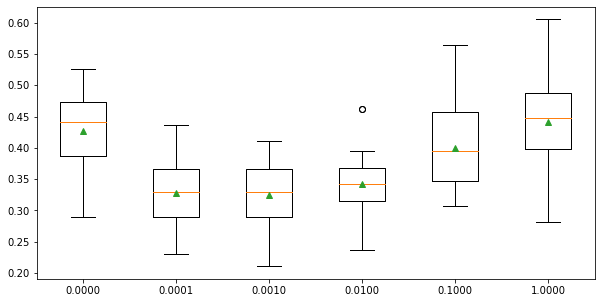

In [33]:
results, names = list(), list()
for name, model in models.items():
    # evaluate the model and collect the scores
    scores = evaluate_model(model, X_PCA_ext, y_WSrank)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize progress along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [35]:
X_College_2019 = pd.read_csv('Data/X_College_2019.csv')

In [54]:
# C=1 is the best model
logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1)
logistic.fit(X_PCA_ext, y_WSrank)
WS_prob = pd.DataFrame(logistic.predict_proba(X_PCA_ext_2019)).T.round(decimals = 3)
WS_prob.columns = X_College_2019.College
#WS_prob.index = np.sort(y_WSrank.WCWS_Rank.unique())
WS_prob.index = ['Champion','Finalist','Semi-Finalist','Top 6','Top 8', 'Top 16', 'Top 32','Top48','Top 64']
WS_prob_cum = WS_prob.cumsum(axis = 0)
WS_prob_cum

College        Oklahoma   UCLA  Washington  Arizona  Florida State  Alabama  \
Champion          0.272  0.027       0.015    0.012          0.522    0.193   
Finalist          0.862  0.240       0.379    0.035          0.550    0.306   
Semi-Finalist     0.894  0.531       0.597    0.085          0.572    0.337   
Top 6             0.939  0.635       0.707    0.150          0.588    0.426   
Top 8             0.947  0.643       0.722    0.178          0.614    0.444   
Top 16            0.999  0.995       0.983    0.997          0.999    0.983   
Top 32            0.999  0.999       1.000    0.999          1.000    0.997   
Top48             0.999  0.999       1.001    1.000          1.000    1.000   
Top 64            0.999  0.999       1.001    1.000          1.000    1.000   

College        Minnesota  Texas  Oklahoma State  Florida  James Madison  \
Champion           0.038  0.040           0.633    0.017          0.095   
Finalist           0.118  0.050           0.634    0.073          0.162   
Semi-Finalist      0.144  0.529           0.661    0.112          0.303   
Top 6              0.329  0.574           0.692    0.212          0.436   
Top 8              0.370  0.639           0.851    0.218          0.495   
Top 16             0.796  0.864           0.966    0.989          0.957   
Top 32             0.953  0.971           0.982    0.999          0.974   
Top48              0.999  0.999           0.999    1.000          1.000   
Top 64             0.999  1.000           0.999    1.000          1.000   

College        Northwestern    LSU  Michigan  Ole Miss  Kentucky  Tennessee  \
Champion              0.009  0.172     0.151     0.014     0.229      0.026   
Finalist              0.018  0.213     0.193     0.157     0.254      0.494   
Semi-Finalist         0.043  0.264     0.258     0.219     0.301      0.567   
Top 6                 0.169  0.410     0.441     0.275     0.450      0.754   
Top 8                 0.174  0.634     0.453     0.288     0.596      0.761   
Top 16                0.584  0.969     0.657     0.939     0.954      0.904   
Top 32                0.899  0.992     0.966     0.989     0.987      0.992   
Top48                 0.998  0.999     0.999     0.999     0.998      1.000   
Top 64                0.999  1.000     1.000     0.999     0.999      1.001   

College          ULL  Texas Tech  Auburn  North Carolina  Drake  \
Champion       0.929       0.182   0.095           0.035  0.063   
Finalist       0.950       0.200   0.236           0.044  0.197   
Semi-Finalist  0.960       0.455   0.269           0.165  0.401   
Top 6          0.964       0.584   0.384           0.188  0.483   
Top 8          0.969       0.629   0.565           0.197  0.497   
Top 16         0.993       0.776   0.973           0.810  0.592   
Top 32         1.000       0.917   0.995           0.956  0.874   
Top48          1.001       0.999   1.001           0.999  0.997   
Top 64         1.001       1.001   1.001           1.002  1.000   

College        South Carolina  Arizona State  Georgia  Missouri  \
Champion                0.021          0.018    0.019     0.068   
Finalist                0.030          0.019    0.134     0.080   
Semi-Finalist           0.055          0.058    0.200     0.102   
Top 6                   0.214          0.146    0.364     0.177   
Top 8                   0.356          0.172    0.466     0.380   
Top 16                  0.823          0.669    0.966     0.826   
Top 32                  0.942          0.817    0.992     0.954   
Top48                   0.992          0.997    1.000     0.995   
Top 64                  1.000          1.000    1.000     0.999   

College        Virginia Tech  Mississippi State  Wisconsin  Tulsa  Stanford  \
Champion               0.176              0.001      0.348  0.000     0.000   
Finalist               0.190              0.006      0.354  0.001     0.009   
Semi-Finalist          0.232              0.031      0.373  0.027     0.091   
Top 6    

In [268]:
Coef = pd.DataFrame(logistic.coef_)
Coef.columns = X_PCA_ext.columns
Coef[Coef.index == 1].T.sort_values(by=1,ascending=False)

1
0                   0.758762
Conf__Big Ten       0.672639
2                   0.642238
13                  0.426731
Conf__SEC           0.405470
Conf__Pac-12        0.382109
3                   0.252055
5                   0.245367
Conf__IVY          -0.000027
Conf__America East -0.000039
Conf__SWAC         -0.000043
Conf__Ivy          -0.000113
Conf__Horizon      -0.000192
Conf__WCC          -0.000227
Conf__WAC          -0.000233
Conf__MEAC         -0.000239
Conf__Big West     -0.000345
Conf__SoCon        -0.000428
Conf__Atlantic 10  -0.000587
Conf__Big Sky      -0.001136
Conf__MAC          -0.001516
Conf__MWC          -0.001959
Conf__Summit       -0.004556
Conf__NEC          -0.007331
Conf__C-USA        -0.008518
Conf__Big South    -0.008690
Conf__Big East     -0.014692
Conf__OVC          -0.015758
Conf__Southland    -0.024527
Conf__MVC          -0.027046
Conf__Patriot      -0.032622
Conf__MAAC         -0.057473
Conf__CAA          -0.090764
14                 -0.093593
Conf__ACC          -0.113667
12                 -0.128826
Conf__ASUN         -0.162502
8                  -0.289682
Conf__Sun Belt     -0.350274
10                 -0.381250
11                 -0.467639
6                  -0.469292
Conf__Big 12       -0.548047
4                  -0.626858
1                  -0.674419
9                  -0.733900
7                  -0.951868

In [256]:
print((1+5+2+5+103)/len(y_WSrank_2019))
confusion_matrix(y_WSrank_2019,logistic.predict(X_PCA_ext_2019))

0.39057239057239057


array([[  0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   1,   0,   0],
       [  0,   1,   0,   0,   0,   6,   1,   0,   0],
       [  1,   0,   2,   0,   0,  11,   2,   0,   0],
       [  0,   0,   1,   0,   0,   3,   6,   4,   2],
       [  0,   0,   2,   0,   0,  17,  54,  67, 109]])

In [137]:
n_bootstrap = 100

y_ex = y_WSrank_2019
X_ex = X_PCA_ext_2019
scores = []
df_WSprob = pd.DataFrame()
df_WSrank = pd.DataFrame()
df_WSrank_binary = pd.DataFrame()
rank_list = [0, 1, 2, 4, 6, 8, 16, 32, 48, len(y_WSrank_2019)]
ranks = [1, 2, 3, 5, 7, 9, 17, 33, 49]
for i_b in range(n_bootstrap):
    idx_resample =  resample(range(len(y_WSrank)), replace=True, n_samples=len(y_WSrank))
    X_i = X_PCA_ext.iloc[idx_resample]
    y_i = y_WSrank.iloc[idx_resample]
    logistic.fit(X_i,y_i)
    idx_test = y_WSrank.index[~y_WSrank.index.isin(y_i.index)]
    scores.append(logistic.score(X_PCA_ext.loc[idx_test],y_WSrank.loc[idx_test]))
    prob_i = pd.DataFrame(logistic.predict_proba(X_PCA_ext_2019)).round(decimals=3)
    prob_i.index = X_College_2019.College
    
    prob_alt = prob_i.cumsum(axis=1).copy()
    y_rank_i = prob_i.copy()*0
    y_hat_i = y_WSrank_2019*0+49
    y_hat_i.index = X_College_2019.College
    for i_col in range(9):
        rank_i = prob_alt[i_col].rank(axis=0, ascending=False)
        col_rank = list(rank_i[rank_i <= (rank_list[i_col+1] - rank_list[i_col])].index)
        y_rank_i.loc[y_rank_i.index.isin(col_rank),i_col] = 1
        y_hat_i.loc[y_hat_i.index.isin(col_rank),'WCWS_Rank'] = ranks[i_col]
        prob_alt = prob_alt[~prob_alt.index.isin(col_rank)]

    df_WSprob = df_WSprob.append(prob_i)
    df_WSrank = df_WSrank.append(y_hat_i)
    df_WSrank_binary = df_WSrank_binary.append(y_rank_i)

df_WSprob.columns = ['Champion','Finalist','Semi-Finalist','Top 6','Top 8', 'Top 16', 'Top 32','Top48','Top 64']
df_WSrank_binary.columns = df_WSprob.columns

In [138]:
df_WSrank

WCWS_Rank
College                        
Oklahoma                    3.0
UCLA                        9.0
Washington                  9.0
Arizona                     9.0
Florida State               9.0
...                         ...
Ark.-Pine Bluff            49.0
UMES                       49.0
Southern U.                49.0
Saint Peter's              49.0
South Carolina State       49.0

[29700 rows x 1 columns]

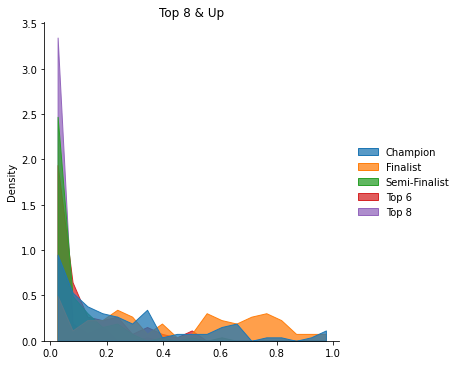

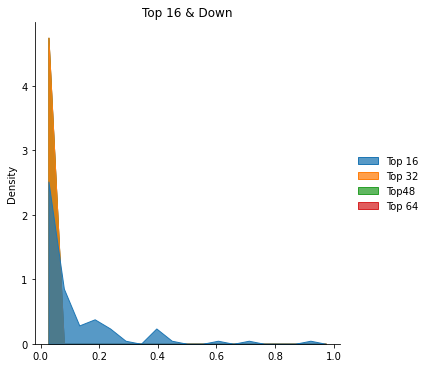

Actual result:  2.0


Champion  Finalist  Semi-Finalist   Top 6  Top 8  Top 16  Top 32  \
% Chance    25.272    43.498          7.255  10.509  2.652  10.755   0.036   

          Top48  Top 64  
% Chance  0.002     0.0

In [175]:
idx_ex = 0
college = X_College_2019.College[idx_ex]
bins = np.linspace(0,1,20)
data = df_WSprob[df_WSprob.index == college]


sn.displot(data=data.iloc[:,0:5],kde=False,bins=bins,element="poly",stat="density") 
plt.title('Top 8 & Up')
plt.show()

sn.displot(data=data.iloc[:,5:9],kde=False,bins=bins,element="poly",stat="density") 
plt.title('Top 16 & Down')
plt.show()

print('Actual result: ', y_WSrank_2019.WCWS_Rank.loc[idx_ex])

df_perc = pd.DataFrame(df_WSprob[df_WSprob.index == college].mean()*100).T
df_perc.index = ['% Chance']
df_perc

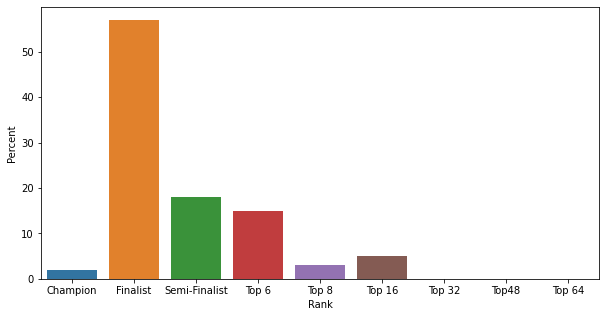

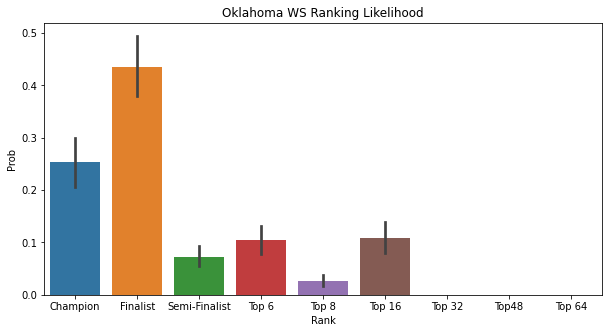

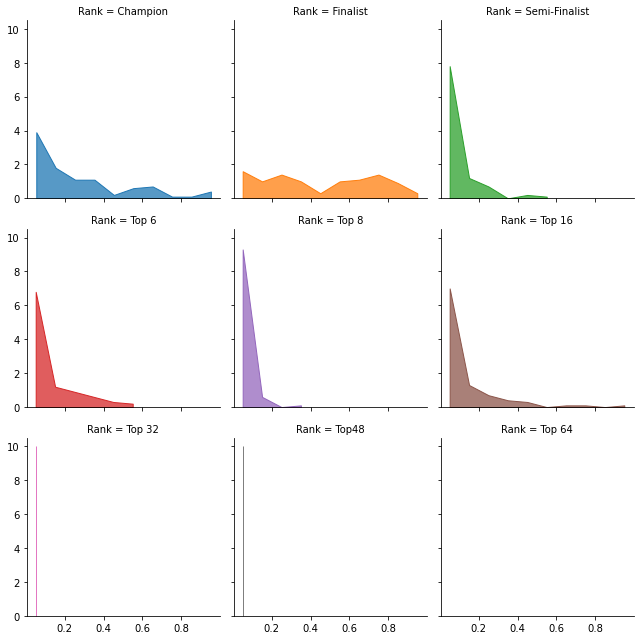

Actual result:  2.0


Champion  Finalist  Semi-Finalist   Top 6  Top 8  Top 16  Top 32  \
% Chance    25.272    43.498          7.255  10.509  2.652  10.755   0.036   

          Top48  Top 64  
% Chance  0.002     0.0

In [232]:
idx_ex = 0
college = X_College_2019.College[idx_ex]
bins = np.linspace(0,1,20)

data = df_WSrank[df_WSrank.index == college]
data_count = pd.DataFrame(data.WCWS_Rank.value_counts()).reset_index()
Rank_list = pd.DataFrame()
Rank_list['Rank'] = ['Champion','Finalist','Semi-Finalist','Top 6','Top 8', 'Top 16', 'Top 32','Top48','Top 64']
Rank_list['RankNum'] = [1, 2, 3, 5, 7, 9, 17, 33, 49]
data_rank = Rank_list.merge(data_count,how='left',left_on='RankNum',right_on='index').fillna(0)

sn.barplot(data=data_rank,x='Rank',y='WCWS_Rank')
plt.ylabel('Percent')
plt.show()

data = df_WSprob[df_WSprob.index == college]
data_stacked = pd.DataFrame(data.stack().reset_index()).drop(columns=['College'])
data_stacked.columns = ['Rank','Prob']

sn.barplot(x="Rank", y="Prob", data=data_stacked)
plt.title(college + ' WS Ranking Likelihood')
plt.show()

ProbGrid = sn.FacetGrid(data_stacked,col='Rank',hue='Rank',col_wrap=3)
ProbGrid.map_dataframe(sn.histplot,x='Prob',element="poly",stat="density",binwidth=0.1)
plt.show()

print('Actual result: ', y_WSrank_2019.WCWS_Rank.loc[idx_ex])

df_perc = pd.DataFrame(df_WSprob[df_WSprob.index == college].mean()*100).T
df_perc.index = ['% Chance']
df_perc

In [255]:
df_WSrank.reset_index().groupby('College').mean().sort_values(by='WCWS_Rank',ascending=True).rank()

WCWS_Rank
College                        
ULL                         1.0
Oklahoma                    2.0
Florida State               3.0
UCLA                        4.0
Washington                  5.0
USC Upstate                 6.0
Arizona                     7.5
Alabama                     7.5
Virginia Tech               9.0
Tennessee                  10.0
Florida                    11.0
LSU                        12.0
Oklahoma State             13.0
Auburn                     14.0
Georgia                    15.0
Texas                      16.0
Ole Miss                   17.0
James Madison              18.0
Kentucky                   19.0
Notre Dame                 20.0
Mississippi State          21.0
Arkansas                   22.0
Michigan                   23.0
Wisconsin                  24.0
Colorado State             25.0
Minnesota                  26.5
Texas Tech                 26.5
Missouri                   28.0
Ohio State                 29.0
North Carolina             30.0
Drake                      31.0
Southeast Mo. State        32.0
UNLV                       33.0
Northwestern               34.0
South Carolina             35.0
Boise State                36.0
UC Davis                   37.0
Hawaii                     38.0
Arizona State              39.0
Coastal Carolina           40.0
NC State                   41.0
Grand Canyon               42.0
North Dakota State         43.0
Marshall                   44.0
UNI                        45.0
Austin Peay                46.0
Louisville                 47.0
Southern Ill.              48.0
Southeastern La.           49.0
Jacksonville State         50.0
Indiana                    51.0
Louisiana Tech             52.0
Texas A&M                  53.0
Houston                    54.0
WKU                        55.0
CSU Fullerton              56.0
Seattle U                  57.0
Liberty                    58.0
Troy                       59.0
UIC                        60.0
South Florida              61.0
UT Arlington               62.0
Ball State                 63.5
California                 63.5
New Mexico State           65.5
Iowa State                 65.5
Fresno State               67.0
Texas State                68.0
Appalachian State          69.5
Oregon State               69.5
Stanford                   71.0
Boston U                   73.0
Nicholls State             73.0
Miami (OH)                 73.0
Hofstra                    75.0
Western Ill.               78.5
Bradley                    78.5
Illinois                   78.5
UTEP                       78.5
Campbell                   78.5
Hampton                    78.5
South Dakota State         85.0
South Alabama              85.0
Rutgers                    85.0
Sam Houston State          85.0
Monmouth                   85.0
UT Martin                  85.0
Holy Cross                 85.0
Robert Morris             193.0
SFA                       193.0
Sacramento State          193.0
Sacred Heart              193.0
Northern Ill.             193.0
Saint Francis (PA)        193.0
SIUE                      193.0
Oakland                   193.0
Rhode Island              193.0
Ohio                      193.0
Omaha                     193.0
Oregon                    193.0
Pacific                   193.0
Northwestern State        193.0
Penn                      193.0
Penn State                193.0
Pittsburgh                193.0
Rider                     193.0
Saint Joseph's            193.0
Prairie View              193.0
Presbyterian              193.0
Providence                193.0
Purdue                    193.0
Purdue Fort Wayne         193.0
Quinnipiac                193.0
Northern Ky.              193.0
Radford                   193.0
Portland State            193.0
Princeton                 193.0
A&M-Corpus Christi        193.0
Saint Mary's (CA)         193.0
UCF                       193.0
UConn                     193.0
UIW                       193.0
UMBC                      193.0
UMES                  

WCWS_Rank
College                        
Oklahoma                    3.0
UCLA                        9.0
Washington                  9.0
Arizona                     9.0
Florida State               9.0
...                         ...
Ark.-Pine Bluff            49.0
UMES                       49.0
Southern U.                49.0
Saint Peter's              49.0
South Carolina State       49.0

[29700 rows x 1 columns]

In [131]:
print((1+1+3+7+1+235)/len(y_WSrank_2019))
confusion_matrix(y_WSrank_2019,y_hat)

0.835016835016835


array([[  0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   1,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   1,   0,   0],
       [  0,   0,   1,   0,   0,   3,   3,   1,   0],
       [  1,   0,   0,   1,   0,   1,   7,   3,   3],
       [  0,   0,   0,   1,   1,   0,   1,   1,  12],
       [  0,   0,   0,   0,   0,   0,   3,  11, 235]])

In [ ]:
confusion_matrix(y_WSrank_2019,logistic.predict(X_PCA_ext_2019))